## Preprocessing Sction.
This section is inspired by the preprocessing of another computer scientist who was using the same dataset to do their own experiments on it.

Link to their repositry: [TanushGoel / Breast-Histopathology-IDC-Classification](https://github.com/TanushGoel/Breast-Histopathology-IDC-Classification)

In [1]:
# Testing that the machine recognizes the GPU
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import os
from os.path import isfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import utils
import itertools
import shutil
np.random.seed(42)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
print(tf.__version__)
print(tf.keras.__version__)

2.9.1
2.9.0


In [4]:
current_dir = os.getcwd()

In [5]:

# to get rid of changing the directory more than once
os.chdir(current_dir)

###### Mostly, taken from the other author's notebook. ######

all_images_dir = 'all_images_dir'
os.chdir('./breast-histopathology-images/')
# copies all images from their seperate folders into the same 
# folder called all_images_dir


# create a list of all patient id's
# each patient id folder has 2 sub folders --> folder 0 and folder 1

# Example:
    # '10285'
        # '0'
        # '1'
    
all_pos_len = len(os.listdir('all_images_dir/1'))
all_neg_len = len(os.listdir('all_images_dir/0'))


if all_pos_len == 0 or all_neg_len == 0:
    cur_dir = os.getcwd()
    patient_list = os.listdir(cur_dir)

    for patient in patient_list:

      try:

        path_0 = str(patient) + '/0'
        path_1 = str(patient) + '/1'

        # create a list of all files in folder 0
        file_list_0 = os.listdir(path_0)
        # create a list of list all file in folder 1
        file_list_1 = os.listdir(path_1)

        # move the 0 images to all_images_dir
        for fname in file_list_0:

            # source path to image
            src = os.path.join(path_0, fname)
            # destination path to image
            dst = os.path.join(all_images_dir, '0', fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)

        # move the 1 images to all_images_dir
        for fname in file_list_1:

            # source path to image
            src = os.path.join(path_1, fname)
            # destination path to image
            dst = os.path.join(all_images_dir, '1', fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)

      except:
         print(patient, 'cannot be copied into proper folder')
else:
    print("Data already exists. Skipped copying")

Data already exists. Skipped copying


In [6]:
# Check how many images are in each folder, to make sure we have correct data
print('Total:', all_pos_len + all_neg_len)
print('Positive:', all_pos_len)
print('Negative:', all_neg_len)

Total: 277524
Positive: 78786
Negative: 198738


In [7]:
###### Mostly, taken from the other author's notebook. ######

# Create a dataframe containing all the information

image_list_1 = os.listdir(f'{all_images_dir}/1')
df_data_1 = pd.DataFrame(image_list_1, columns=['image_id'])

image_list_0 = os.listdir(f'{all_images_dir}/0')
df_data_0 = pd.DataFrame(image_list_0, columns=['image_id'])

df_data = pd.concat([df_data_1, df_data_0])

In [8]:
# Validating that the data now exists in the dataframe
df_data.head()

,image_id
0,13462_idx5_x751_y1351_class1.png
1,9181_idx5_x2651_y651_class1.png
2,13687_idx5_x2351_y701_class1.png
3,13916_idx5_x1101_y1101_class1.png
4,10302_idx5_x2101_y151_class1.png


In [9]:
###### Mostly, taken from the other author's notebook. ######

# Define Helper Functions

# Each file name has this format:
# '14211_idx5_x2401_y1301_class1.png'

def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    # the id is the first index in the list
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# extract the patient id

# create a new column called 'patient_id'
df_data['patient_id'] = df_data['image_id'].apply(extract_patient_id)
# create a new column called 'target'
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head()

,image_id,patient_id,target
0,13462_idx5_x751_y1351_class1.png,13462,1
1,9181_idx5_x2651_y651_class1.png,9181,1
2,13687_idx5_x2351_y701_class1.png,13687,1
3,13916_idx5_x1101_y1101_class1.png,13916,1
4,10302_idx5_x2101_y151_class1.png,10302,1


### The class distribution of the dataset.
There are more negative cases than the positive ones. This makes the dataset imbalanced since the nature of the problem doesn't require that the number of negative cases to be more or less than the positive ones.

Text(0.5, 1.0, 'Class Distributions')

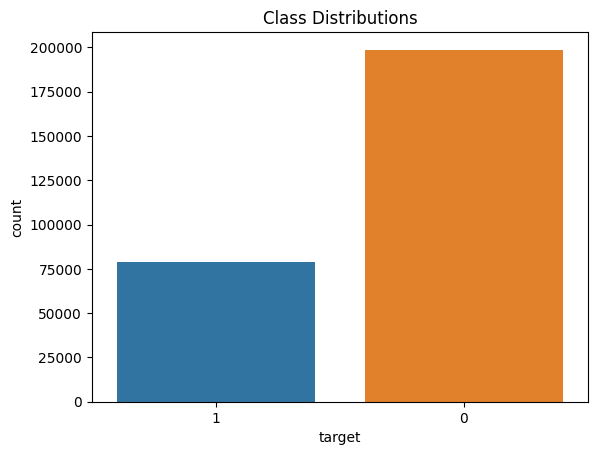

In [10]:
# Showing the class distribution of the dataset, We find that the negative is way more than the positives.
sns.countplot(x=df_data.target).set_title("Class Distributions")

# Train / Test / Validation

In [11]:
from sklearn.model_selection import train_test_split

y = df_data['target']

_, df_test = train_test_split(df_data, test_size=0.03603, random_state=42, stratify=y)

_, df_val = train_test_split(df_data, test_size=0.0036025, random_state=42, stratify=y)

print('Valid:', df_val.shape[0])
print('Test:', df_test.shape[0])

Valid: 1000
Test: 10000


Text(0.5, 1.0, 'Valid Class Distributions')

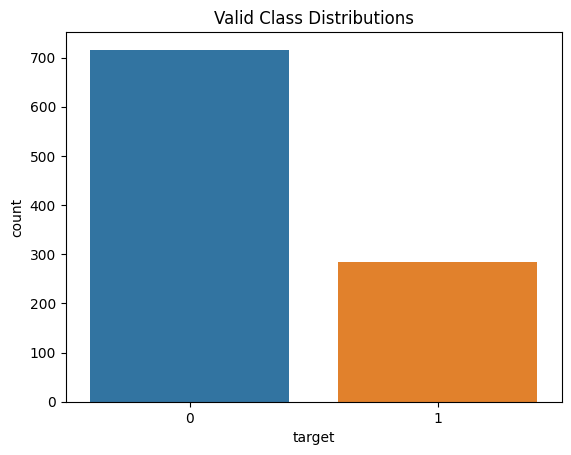

In [12]:
sns.countplot(x=df_val['target']).set_title('Valid Class Distributions')

Text(0.5, 1.0, 'Test Class Distributions')

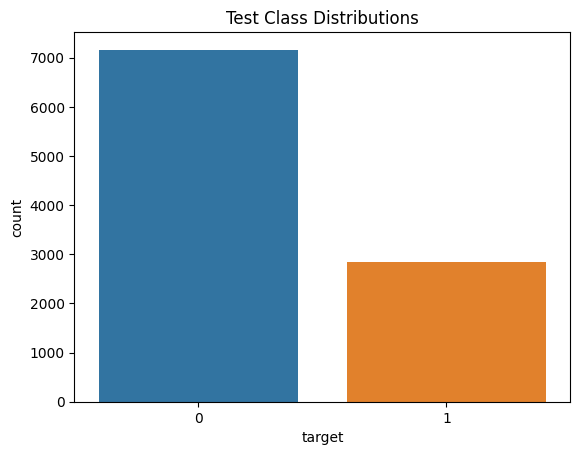

In [13]:
sns.countplot(x=df_test['target']).set_title('Test Class Distributions')

In [14]:
# Improved the speed of the identification through using a dictionary... Dramatically.
val_dict = df_val.set_index('image_id').T.to_dict('list')
test_dict = df_test.set_index('image_id').T.to_dict('list')

def identify_train_val_and_test_rows(x):
    if str(x) in val_dict:
        return 'val'
    elif str(x) in test_dict:
        return 'test'
    else:
        return 'train'

# create a new colum that is a copy of the image_id column
df_data['train_or_val_or_test'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val_or_test'] = df_data['train_or_val_or_test'].apply(identify_train_val_and_test_rows)
   
# filter out train rows
df_train = df_data[df_data['train_or_val_or_test'] == 'train']

print('Train:', len(df_train))
print('Valid:', len(df_val))
print('Test:', len(df_test))

Train: 267524
Valid: 1000
Test: 10000


Text(0.5, 1.0, 'Train Class Distributions')

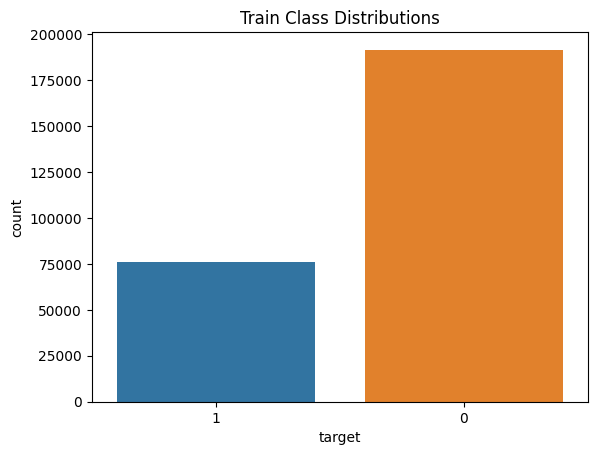

In [15]:
sns.countplot(x=df_train['target']).set_title('Train Class Distributions')

In [16]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)
df_data.head()

,patient_id,target,train_or_val_or_test
image_id,,,
13462_idx5_x751_y1351_class1.png,13462,1,train
9181_idx5_x2651_y651_class1.png,9181,1,train
13687_idx5_x2351_y701_class1.png,13687,1,train
13916_idx5_x1101_y1101_class1.png,13916,1,train
10302_idx5_x2101_y151_class1.png,10302,1,train


In [17]:
# Make Train, Valid, and Test Folders


# Create folders within the train, valid, and test folders
# Inside each folder we create seperate folders for each class

# train_dir
train_dir = os.path.join('train_dir')
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)
    # create new folders inside train_dir
    os.mkdir(os.path.join(train_dir, '1'))
    os.mkdir(os.path.join(train_dir, '0'))
    
# val_dir
val_dir = os.path.join('val_dir')
if not os.path.isdir(val_dir):
    os.mkdir(val_dir)
    # Create new folders inside val_dir
    os.mkdir(os.path.join(val_dir, '1'))
    os.mkdir(os.path.join(val_dir, '0'))

# test_dir
test_dir = os.path.join('test_dir')
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)
    # Create new folders inside test_dir
    os.mkdir(os.path.join(test_dir, '1'))
    os.mkdir(os.path.join(test_dir, '0'))

In [18]:
if len(os.listdir(train_dir)) == 0:
    # Get a list of train, val, and test images
    train_list = list(df_train['image_id'])
    val_list = list(df_val['image_id'])
    test_list = list(df_test['image_id'])

    # Transfer the train images

    for image in train_list:

        pat_id = df_data.loc[image,'patient_id']
        label = df_data.loc[image,'target']
        src = pat_id + '/' + label + '/' + image

        # destination path to image
        dst = os.path.join(train_dir, label, image)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # Transfer the val images

    for image in val_list:

        pat_id = df_data.loc[image,'patient_id']
        label = df_data.loc[image,'target']
        src = pat_id + '/' + label + '/' + image

        # destination path to image
        dst = os.path.join(val_dir, label, image)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # Transfer the test images
    for image in test_list:

        pat_id = df_data.loc[image,'patient_id']
        label = df_data.loc[image,'target']
        src = pat_id + '/' + label + '/' + image

        # destination path to image
        dst = os.path.join(test_dir, label, image)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
else:
    print("Data already exists (Hopefully)")

Data already exists (Hopefully)


In [19]:
print('Train Total:', len(os.listdir('train_dir/1'))+len(os.listdir('train_dir/0')))
print('Valid Total:', len(os.listdir('val_dir/1'))+len(os.listdir('val_dir/0')))
print('Test Total:', len(os.listdir('test_dir/1'))+len(os.listdir('test_dir/0')), '\n')

print('Train Negative:', len(os.listdir('train_dir/0')))
print('Train Positive:', len(os.listdir('train_dir/1')), '\n')

print('Valid Negative:', len(os.listdir('val_dir/0')))
print('Valid Positive:', len(os.listdir('val_dir/1')), '\n')

print('Test Negative:', len(os.listdir('test_dir/0')))
print('Test Positive:', len(os.listdir('test_dir/1')))

Train Total: 383171
Valid Total: 1000
Test Total: 10000 

Train Negative: 191577
Train Positive: 191594 

Valid Negative: 716
Valid Positive: 284 

Test Negative: 7161
Test Positive: 2839


# Agumentation


### Create train / test / validation batches

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'train_dir'
valid_path = 'val_dir'
test_path = 'test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)

train_batch_size = 500
val_batch_size = 500

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [21]:
datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input, 
                             horizontal_flip=True,
                             vertical_flip=True)
image_size=224

train_batches_bench = datagen.flow_from_directory(train_path, 
                                                  target_size=(image_size, image_size),
                                                  batch_size=train_batch_size)

valid_batches_bench = datagen.flow_from_directory(valid_path,  
                                                  target_size=(image_size, image_size),
                                                  batch_size=val_batch_size)

test_batches_bench = datagen.flow_from_directory(test_path,  
                                                 target_size=(image_size, image_size),
                                                 batch_size=1,
                                                 shuffle=False) # test dataset should not be shuffled

Found 383171 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


## Train Baseline Model (VGG19)

In [22]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = tf.keras.applications.vgg19.VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(244, 244, 3)
)


2022-10-20 23:01:57.908746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 23:01:58.726475: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15087 MB memory:  -> device: 0, name: Quadro P5000, pci bus id: 0000:65:00.0, compute capability: 6.1


In [23]:
for layer in vgg.layers:
  layer.trainable = False

In [24]:
x = tf.keras.layers.Flatten()(vgg.output)  # One flatten layer

In [25]:
prediction = tf.keras.layers.Dense(2, activation='softmax')(x) # one softmax layer

In [26]:
model = tf.keras.Model(inputs=vgg.input, outputs=prediction)   # Final Model

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [28]:
# This needs to be checked
# We need to know which data to be added exactly. We want the Image Data Generator function but without any agumentation (for now)
# did not have time to check exactly how. 
# Try to compare with the paper stuff. Hopefully we will be able to find something.
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint(filepath='breast_histopathology_bench_best.hdf5', verbose=1, save_best_only=True)

class_weights={
    0: 1.0, # negative
    1: 1.0, # postive 
    # make model more sensitive to positive class if necessary
}

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(train_batches_bench, 
                                            steps_per_epoch=train_steps, 
                                            class_weight=class_weights,
                                            validation_data=valid_batches_bench,
                                            validation_steps=val_steps,
                                            callbacks=[model_checkpoint], 
                                            epochs=30, 
                                            verbose=1)

Epoch 1/30


2022-10-20 23:02:01.509324: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2022-10-20 23:02:01.816280: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-10-20 23:02:02.171807: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


536/536 [==============================] - ETA: 0s - loss: 0.3034 - accuracy: 0.8692
Epoch 1: val_loss improved from inf to 0.39388, saving model to breast_histopathology_bench_best.hdf5
536/536 [==============================] - 1185s 2s/step - loss: 0.3034 - accuracy: 0.8692 - val_loss: 0.3939 - val_accuracy: 0.8200
Epoch 2/30
536/536 [==============================] - ETA: 0s - loss: 0.2634 - accuracy: 0.8858
Epoch 2: val_loss improved from 0.39388 to 0.38094, saving model to breast_histopathology_bench_best.hdf5
536/536 [==============================] - 1150s 2s/step - loss: 0.2634 - accuracy: 0.8858 - val_loss: 0.3809 - val_accuracy: 0.8420
Epoch 3/30
536/536 [==============================] - ETA: 0s - loss: 0.2605 - accuracy: 0.8876
Epoch 3: val_loss did not improve from 0.38094
536/536 [==============================] - 1150s 2s/step - loss: 0.2605 - accuracy: 0.8876 - val_loss: 0.3864 - val_accuracy: 0.8310
Epoch 4/30
536/536 [==============================] - ETA: 0s - loss:

Epoch 30/30
536/536 [==============================] - ETA: 0s - loss: 0.2539 - accuracy: 0.8921
Epoch 30: val_loss did not improve from 0.37407
536/536 [==============================] - 1160s 2s/step - loss: 0.2539 - accuracy: 0.8921 - val_loss: 0.4030 - val_accuracy: 0.8410


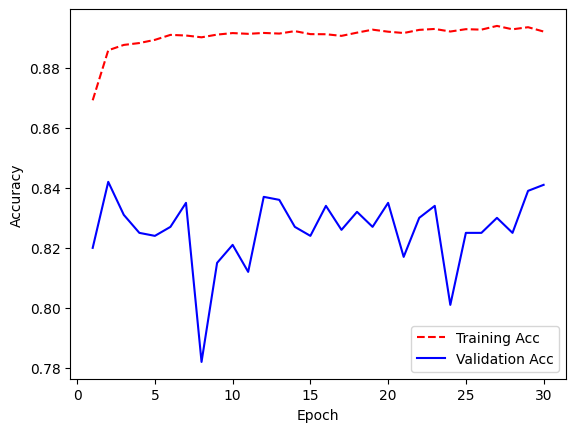

In [37]:
import matplotlib.pyplot as plt
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch_count = range(1, 31)

plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig("vgg19-baseline-model.png")
plt.show()


In [ ]:
# Since we now have an output for the VGG19 model alone, we now can start on checking out the output
# with agumented output.
# P.S. this figure above is saved on desk as well. Do the same with the agumented version :D